In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# data read
df = pd.read_csv("smartcart_customers.csv")


In [3]:
# handle null values
df["Income"] = df["Income"].fillna(df["Income"].median())


## 1.Feature Engeenearing

In [4]:
# add age feature

df["Age"] = 2026-df["Year_Birth"]

In [5]:
# add Customer_Tenure_Days feature

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst= True)

reference_date = df["Dt_Customer"].max() 

df["Customer_Tenure_Days"] = (reference_date - df["Dt_Customer"]).dt.days

In [6]:
# spending feature add

df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] +df["MntSweetProducts"] + df["MntGoldProds"]
    

In [7]:
# total_children 

df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [8]:
# Handle -- Education - UG,Greduate ,PHD

df["Education"] = df["Education"].replace({
    "Basic" : "Undergreduate","2n Cycle": "Undergreduate",
    "Greuation" : "Greduate","Master" : "Postgreduate",
    "PhD" : "Postgreduate"
})
    

In [9]:
# Handle marrit status -- living ,non leaving

df["Living_with"] = df["Marital_Status"].replace({
    "Married" : "Partner","Together": "Partner",
    "Divorced" : "Alone","Single" : "Alone",
    "Widow": "Alone","Alone" : "Alone","Absurd" : "Alone","YOLO" : "Alone"
})


In [10]:
# drop columns 
cols = ["ID","Year_Birth","Marital_Status","Dt_Customer","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
       "Kidhome","Teenhome"]

df_cleaned = df.drop(columns = cols)
print(len(df_cleaned))

2240


##  Detecting and Removing Outliers

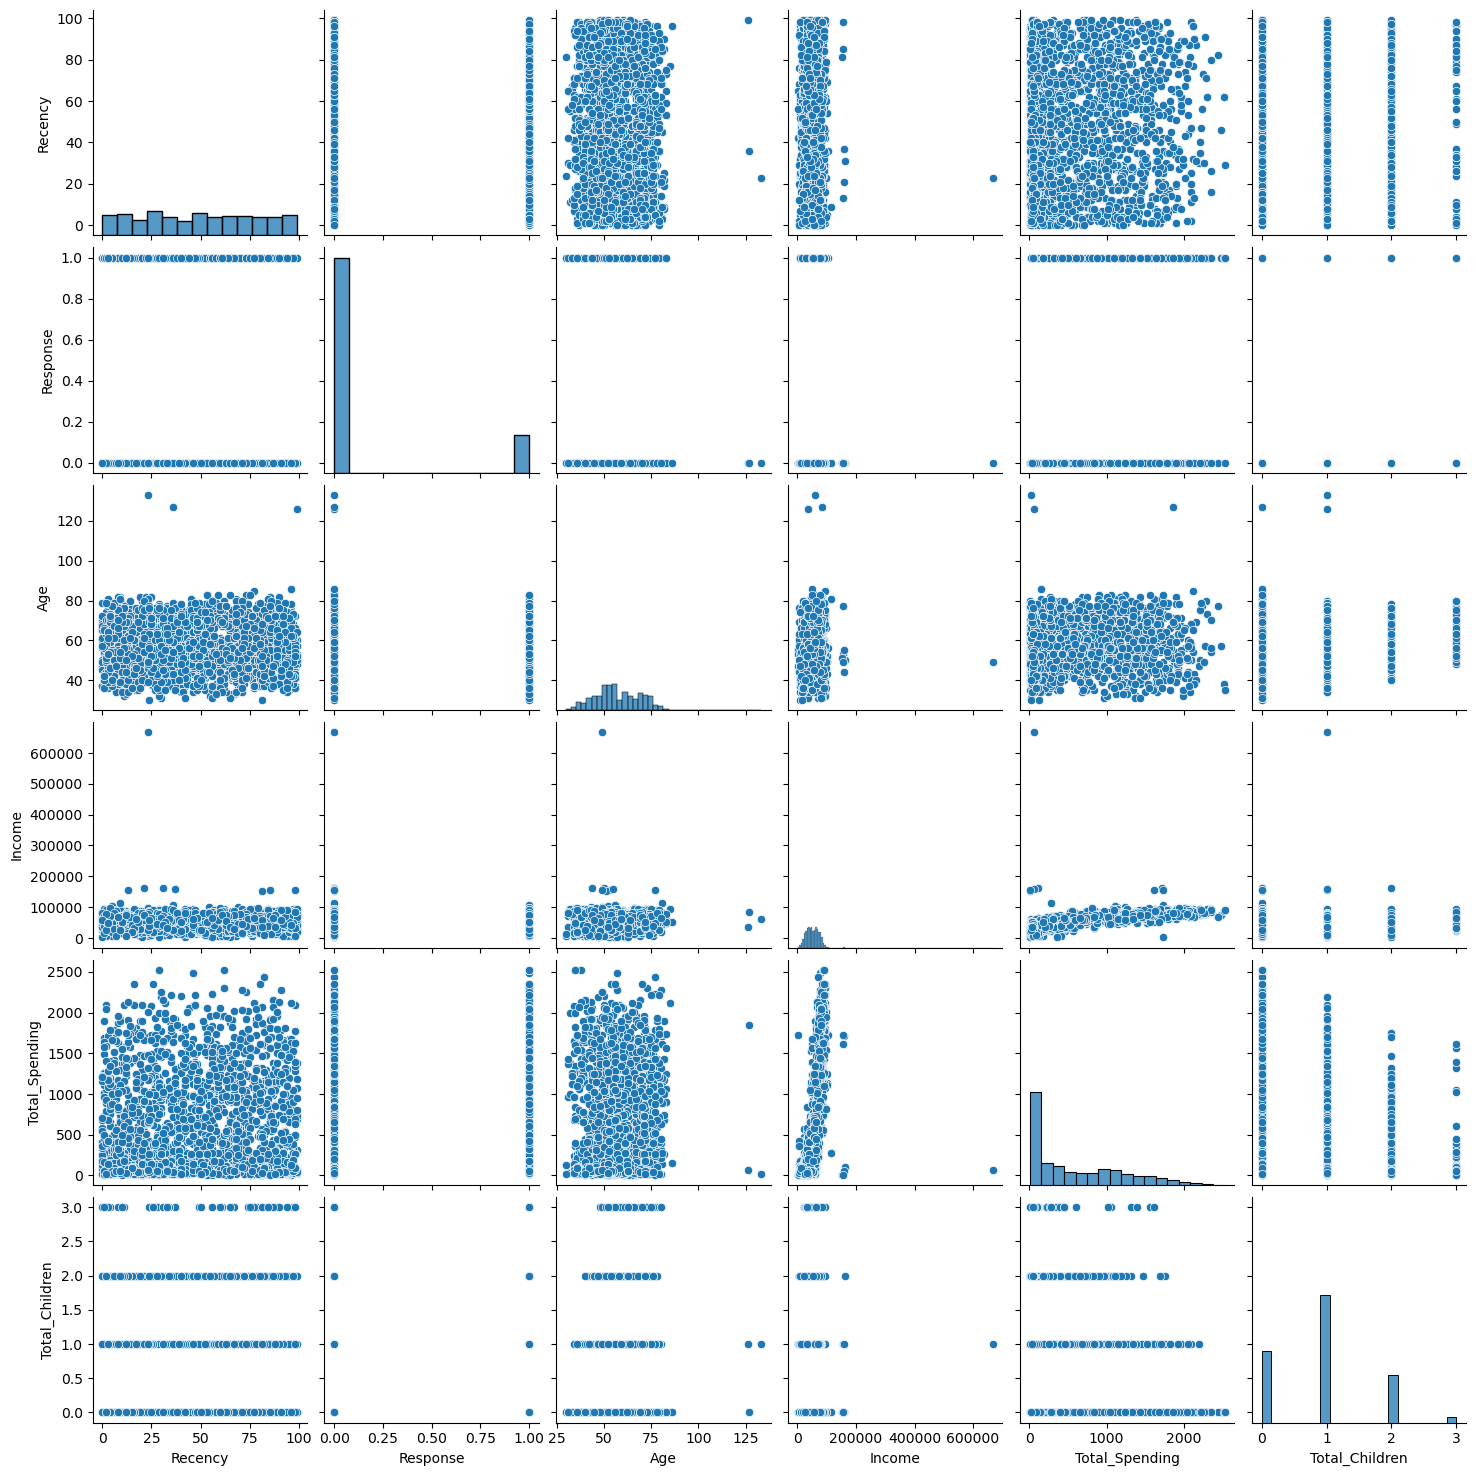

In [11]:
#relative plot of some features

cols = ["Recency","Response","Age","Income","Total_Spending","Total_Children"]
sns.pairplot(df_cleaned[cols])


#### remove outliers

In [12]:
df_cleaned = df_cleaned[(df_cleaned["Age"] < 90)]
df_cleaned = df_cleaned[(df_cleaned["Income"] < 600_000)]

df_cleaned.shape

(2236, 15)

## Corelation check

In [13]:
# correltion metrix 
corr = df_cleaned.corr(numeric_only = True)


<Axes: >

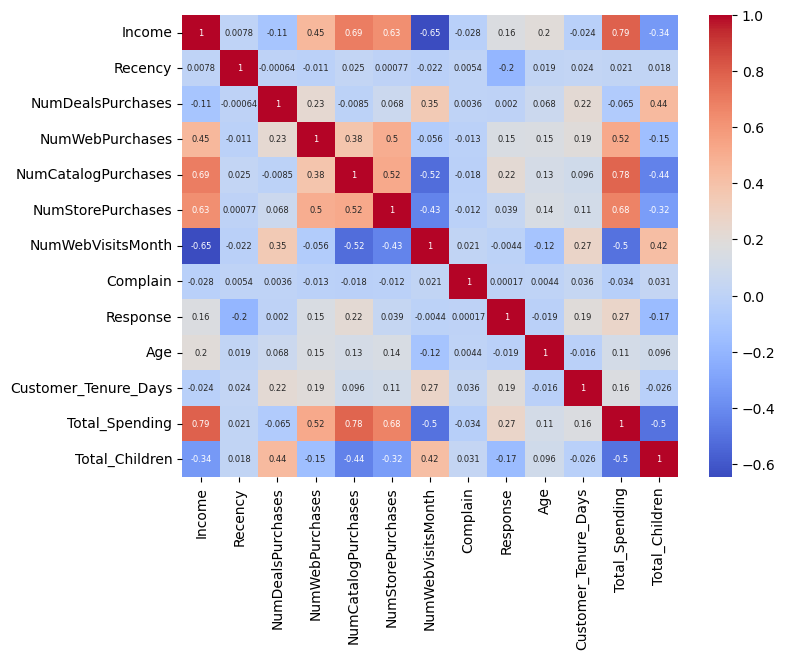

In [14]:
# create heatmap
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    annot_kws={"size":6},
    cmap="coolwarm"
)

## Encoding

In [15]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_with
0,Graduation,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduation,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduation,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduation,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgreduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


In [16]:
# one hot encoding
from sklearn.preprocessing  import OneHotEncoder
ohe = OneHotEncoder()

cat_cols = ["Education","Living_with"]
enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [17]:
# transform into data frame

enc_df = pd.DataFrame(enc_cols.toarray(),columns=ohe.get_feature_names_out(cat_cols),index=df_cleaned.index)

In [18]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols),enc_df] ,axis=1)

In [19]:
df_encoded

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduation,Education_Postgreduate,Education_Undergreduate,Living_with_Alone,Living_with_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,1.0,0.0,0.0,0.0,1.0
2236,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,0.0,1.0,0.0,0.0,1.0
2237,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,1.0,0.0,0.0,1.0,0.0
2238,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,0.0,1.0,0.0,0.0,1.0


## scaling

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
X = df_encoded

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Use PCa 

In [22]:
from sklearn.decomposition import PCA


In [23]:
pca=PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)


In [24]:
pca.explained_variance_ratio_


array([0.23163158, 0.11385454, 0.10405815])

C:\Users\yoges_o0ltnmt\.conda\envs\ml_env\lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 0.92, '3D Projection')

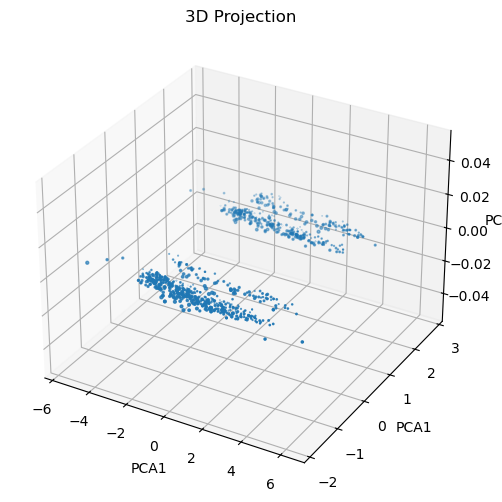

In [25]:
# plot

fig= plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection = "3d")

plt.scatter(
    X_pca[:,0],X_pca[:,1],X_pca[:,2]
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA1")
ax.set_zlabel("PCA1")
ax.set_title("3D Projection")



In [26]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

# Apply UN-S-ML

## 1.Analyze k value

In [27]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters = k,random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)
    

In [28]:
knee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k = knee.elbow

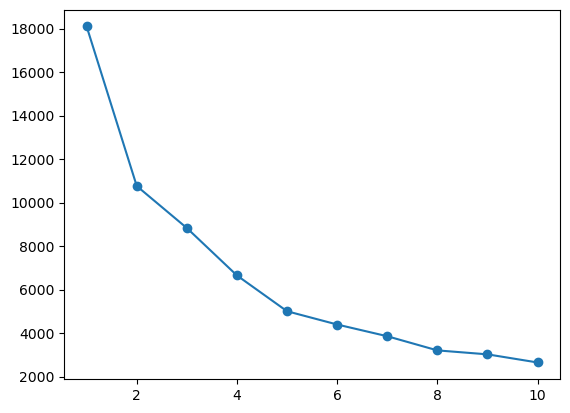

In [29]:
plt.plot(range(1,11),wcss,marker = 'o')

In [30]:
print(optimal_k)

4


## calculate with silhoutte score

In [31]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2,11):
    kmeans=KMeans(n_clusters = k,random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca,labels)
    scores.append(score)

optimal_k = knee.elbow

print(scores)

[0.37157939079771013, 0.3076881927475844, 0.3580996159598177, 0.40001521476642127, 0.3992918389861368, 0.40262087405633423, 0.4050858828695688, 0.4011889704659053, 0.40291173364877597]


Text(0, 0.5, 'silhouette_score')

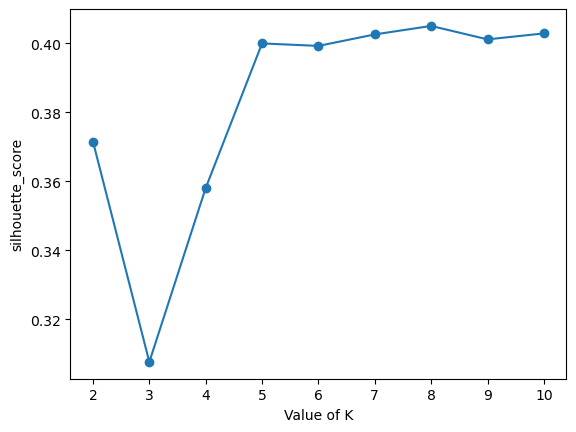

In [32]:
plt.plot(range(2,11),scores,marker = 'o')
plt.xlabel("Value of K")
plt.ylabel("silhouette_score")


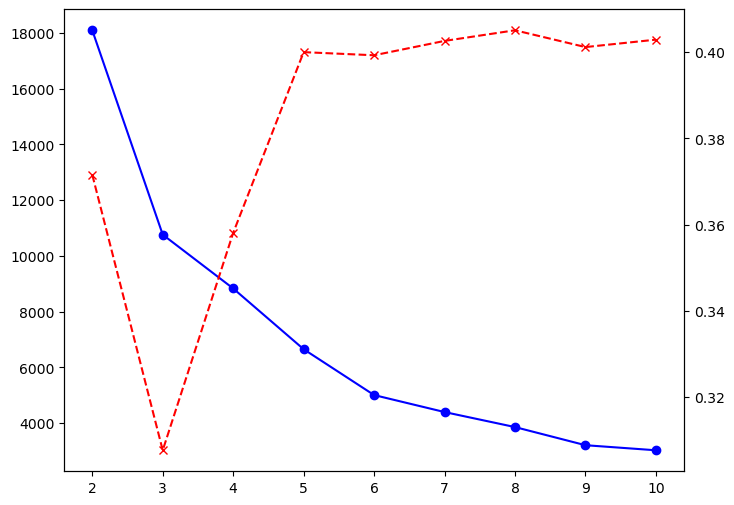

In [33]:
# combine plot
k_range= range(2,11)

fig,ax1 = plt.subplots(figsize=(8,6))

ax1.plot(k_range ,wcss[:len(k_range)],marker = 'o' ,color ="blue")

# k_range= range(2,11)

ax2 = ax1.twinx()
ax2.plot(k_range ,scores[:len(k_range)],marker = 'x' ,color ="red",linestyle = '--')

## 2.Apply the clustering

In [34]:
# apply AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering


In [35]:
agg_clf = AgglomerativeClustering(n_clusters = 4,linkage="ward")
agg_labels = agg_clf.fit_predict(X_pca)

C:\Users\yoges_o0ltnmt\.conda\envs\ml_env\lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 0.92, '3D Projection')

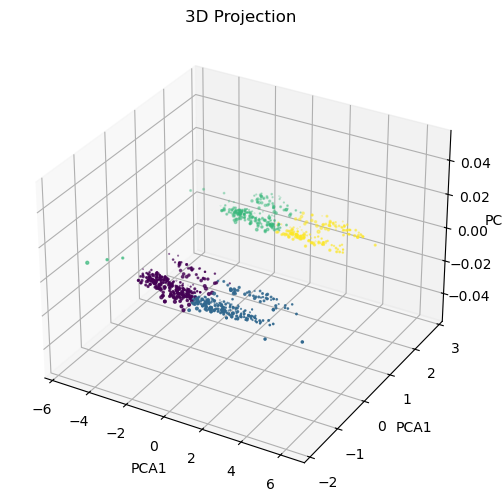

In [36]:
fig= plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection = "3d")

plt.scatter(
    X_pca[:,0],X_pca[:,1],X_pca[:,2],c=agg_labels
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA1")
ax.set_zlabel("PCA1")
ax.set_title("3D Projection")

## charecterization of clusters

In [37]:
X["clusters"] = agg_labels


In [38]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Education_Graduation,Education_Postgreduate,Education_Undergreduate,Living_with_Alone,Living_with_Partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

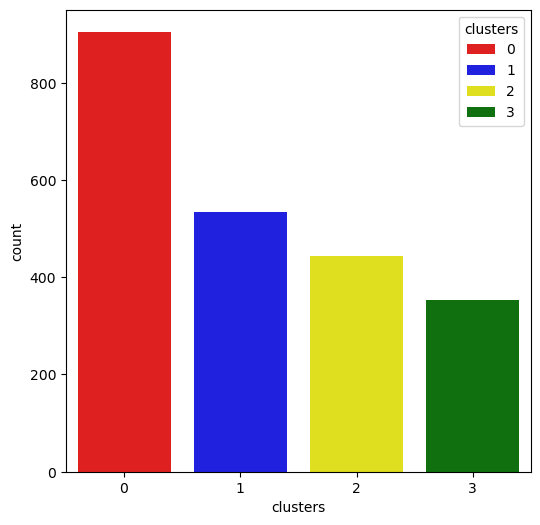

In [39]:
# number of cluster for each costomer

pal = ["red","blue","yellow","green"]
fig= plt.figure(figsize=(6,6))
sns.countplot(x = X["clusters"], palette = pal ,hue =X["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

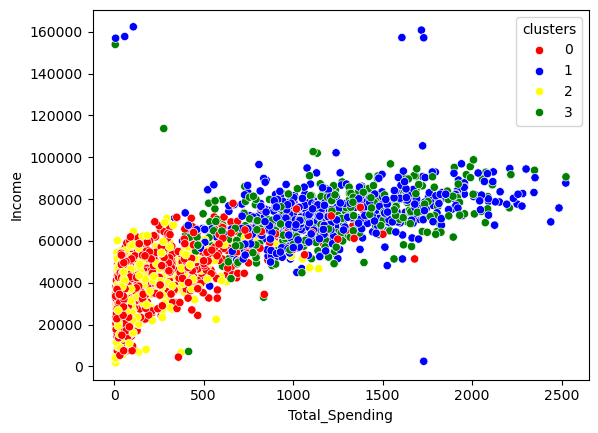

In [40]:
# imcome and spending 

sns.scatterplot(x=X["Total_Spending"],y=X["Income"],hue = X["clusters"],palette = pal)

In [41]:
# Cluster summery

cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_Tenure_Days  Total_Spending  \
clu

# summary

## cluster 0
#### Provide family shoppers,discounts
1. Low income
2. low spending
3. low web purchases
4. more children
5. living with partners
6. website visit high
7. undergreduate
8. family shopers

## cluster 1
#### We provide some loyalty program
1. few childrens
2. high spending
3. high web purchases
4. high income
5. living with partners
6. greduation or post greduation
7. web visit low and purchases are high
8. low responce

## cluster 2
#### Digitel browsers,target when sales annd other offers are availble

1. Low income
2. low spending
3. low web purchases
4. more children
5. family shopers
6. living alone
7. website visit high
8. undergreduate

## cluster 3
#### Best roi ,high value single,offer premium servises
1. few childrens
2. high web purchases
3. high income
4. high spending
5. living alone
6. greduation or post greduation
7. web visit and purchases both are high
8. high responce